# Klassifikation

Die Klassifikatoren dienen dazu, Datensätzen in unterschiedliche Klassen einzuteilen. Hierzu gibt es im scikit-learn Package für Python mehrere Algorithmen. Wir schauen uns hier ein paar der gängigsten an.

Für dieses Beispiel verwenden wir die Beispieldatensätze von sklearn und erklären Schritt für Schritt, was wir genau machen.
Diese Anleitungen verwenden die vorgegebenen DataSets von scikit-learn. Dabei arbeiten wir mit dem "Iris"-Dataset, welches verschieden Spezies von Iris-Blumen anhand der Blütendimensionen klassifiziert.

Bemerkung: In diesem Notebook hat es einigen duplizierten Code. Dies dient dazu, die verschiedenen Teile ohne Übersicht möglichst einfach verständlich zu halten. Für z.B. die doppelten Plots wäre eigene Funktionen zu definieren sonst empfohlen.

## Iris-Datenset

### Libraries und Daten importieren

In [1]:
# Beispiel angelehnt an How-To von scikit-learn.org
# Pyplot importieren
import matplotlib.pyplot as plt

# Seaborn importieren
import seaborn as sns

# Farben von Pyplot importieren
from matplotlib.colors import ListedColormap

# sklearn libraries importieren
from sklearn import neighbors, tree, datasets

# Numpy importieren
import numpy as np

In [2]:
iris = datasets.load_iris()

In [ ]:
iris

In [4]:
# Nachbarn auf 15 setzen (k von KNN)
n_neighbors = 15

# Farben für plots initialisieren
cmap_light = ["orange", "cyan", "cornflowerblue"]
cmap_bold = ["darkorange", "c", "darkblue"]

# Iris Dataset importieren
iris = datasets.load_iris()

# Wir nehmen hier nur die ersten zwei Features, damit wir eine bessere
# Übersicht verschaffen können

X = iris.data[:, :2]
Y = iris.target

In [5]:
# Einzuschätzende Punkte, simple Liste
X_test = np.array([[4.5, 3.5], [8, 3.5], [6, 2.5], [5.25, 2.5]])

# Einzuschätzende Punkte, Hintergrund mit mesh-grid einzeichnen
# Dieser Code ist komplex, das zu verstehen ist nicht erwartet

# Schritt-Grösse im Mesh-Grid
h = 0.02

# Mesh-Grid aufsetzen
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_mesh = np.c_[xx.ravel(), yy.ravel()]

### Übersicht über die Daten

In [6]:
# Ersten fünf Positionen
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [7]:
# Klasse der ersten fünf Positionen
Y[:5]

array([0, 0, 0, 0, 0])

In [8]:
# Letzte fünf Positionen
X[-5:]

array([[6.7, 3. ],
       [6.3, 2.5],
       [6.5, 3. ],
       [6.2, 3.4],
       [5.9, 3. ]])

In [9]:
# Klasse der letzten fünf Positionen
Y[-5:]

array([2, 2, 2, 2, 2])

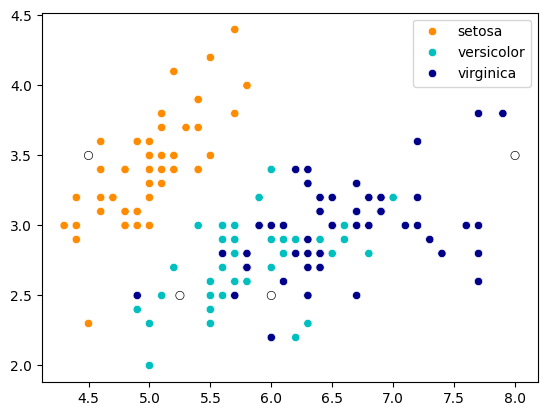

In [10]:
fix, ax = plt.subplots()

# Bekannte Punkte plotten
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[Y],
    palette=cmap_bold,
    ax=ax
)

# Zu klassifizierende Punkte
# Die zu klassifierenden Punkte sind weiss mit einem schwarzen Rand
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    ax=ax,
    hue=0,
    edgecolor="black",
    palette=["white"],
    legend=False
)

plt.show()

## Nearest Neighbors

### Prinzip

Das Prinzip von k-Nearest-Neighbors (KNN) ist, dass die k nächsten Nachbarn eines Punktes betrachtet werden. Der Punkt wird der Klasse zugewiesen, welche am meisten bei den k nächsten Nachbarn vorkommt.

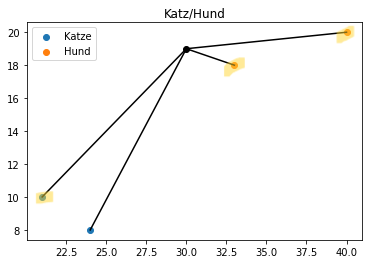

Hier ist der zu klassifizierende Punkt in schwarz und die bekannten Punkte in der jeweiligen Farbe der Klasse eingezeichnet. Für k=3 sind die nächsten Nachbarn markiert. Zwei sind Hunde, einer ist eine Katze. Daher wird der zu klassifizierende Punkt als Hund klassifiziert.

### Modell erstellen, trainieren und Daten schätzen

In [11]:
# KNN Classifier erstellen
# Die n_neighbors können angepasst werden. Die weights ebenfalls, entweder
# "uniform" oder "weighted".
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")

# Modell auf die gegebenen Daten trainieren
clf_knn.fit(X, Y)

# Modell auf die simple Liste anwenden
Y_predict = clf_knn.predict(X_test)

# Modell auf das Mesh-Grid anwenden
Y_mesh = clf_knn.predict(X_mesh)
Z_mesh = Y_mesh.reshape(xx.shape)

Auswertung: Gehe direkt zu Kapitel Resultate darstellen, nachdem du diesen Code ausgeführt hast.

## Decision Tree

### Prinzip

Im Decision Tree wird verschachtelt Entschieden, in welche Klasse ein Wert getan werden soll. Es wird im obersten Knoten angefangen und in jedem Knoten wird anhand einer Bedingung ein Ast gewählt. Wenn ein Knoten keine Kinder hat, genannt Blatt, wird die Klasse des Knotens gewählt. Diese entspricht jeweils der Mehrheit der Werte in diesem Knoten.

Ein Beispiel mit X=[5,7] im unteren Baum:

1. Ebene: X[0] == 5 <= 5.45 -> linker Ast
2. Ebene: X[1] == 7 > 2.8 -> rechter Ast
3. Ebene: Keine Bedingung, wähle Klasse "versicolor".

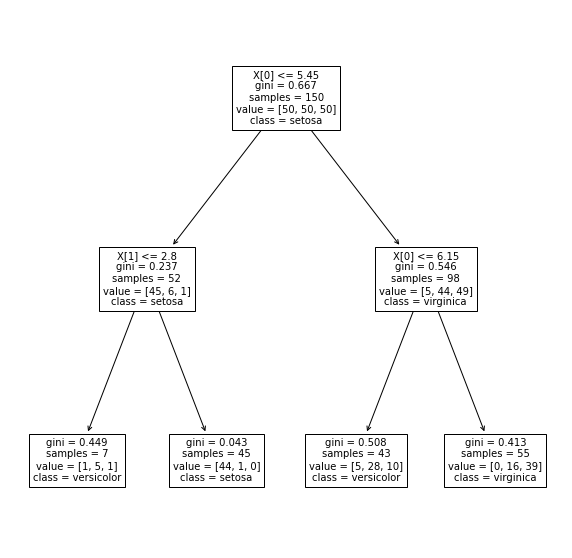

### Modell erstellen, trainieren und Daten schätzen

In [14]:
# Decision Tree Classifier erstellen
# Die max_depth kann angepasst werden. Ganzzahl oder `max_depth=None`.
clf_dt = tree.DecisionTreeClassifier(max_depth=5)

# Modell auf die gegebenen Daten trainieren
clf_dt.fit(X, Y)

# Modell auf die simple Liste anwenden
Y_predict = clf_dt.predict(X_test)

# Modell auf das Mesh-Grid anwenden
Y_mesh = clf_dt.predict(X_mesh)
Z_mesh = Y_mesh.reshape(xx.shape)

[Text(0.5, 0.9, 'x[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2222222222222222, 0.7, 'x[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]\nclass = setosa'),
 Text(0.1111111111111111, 0.5, 'x[0] <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]\nclass = versicolor'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = setosa'),
 Text(0.16666666666666666, 0.3, 'x[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.1, '\n  (...)  \n'),
 Text(0.2222222222222222, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 5.35\ngini = 0.043\nsamples = 45\nvalue = [44, 1, 0]\nclass = setosa'),
 Text(0.2777777777777778, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.3888888888888889, 0.3, 'x[1] <= 3.2\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]\nclass = setosa'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 T

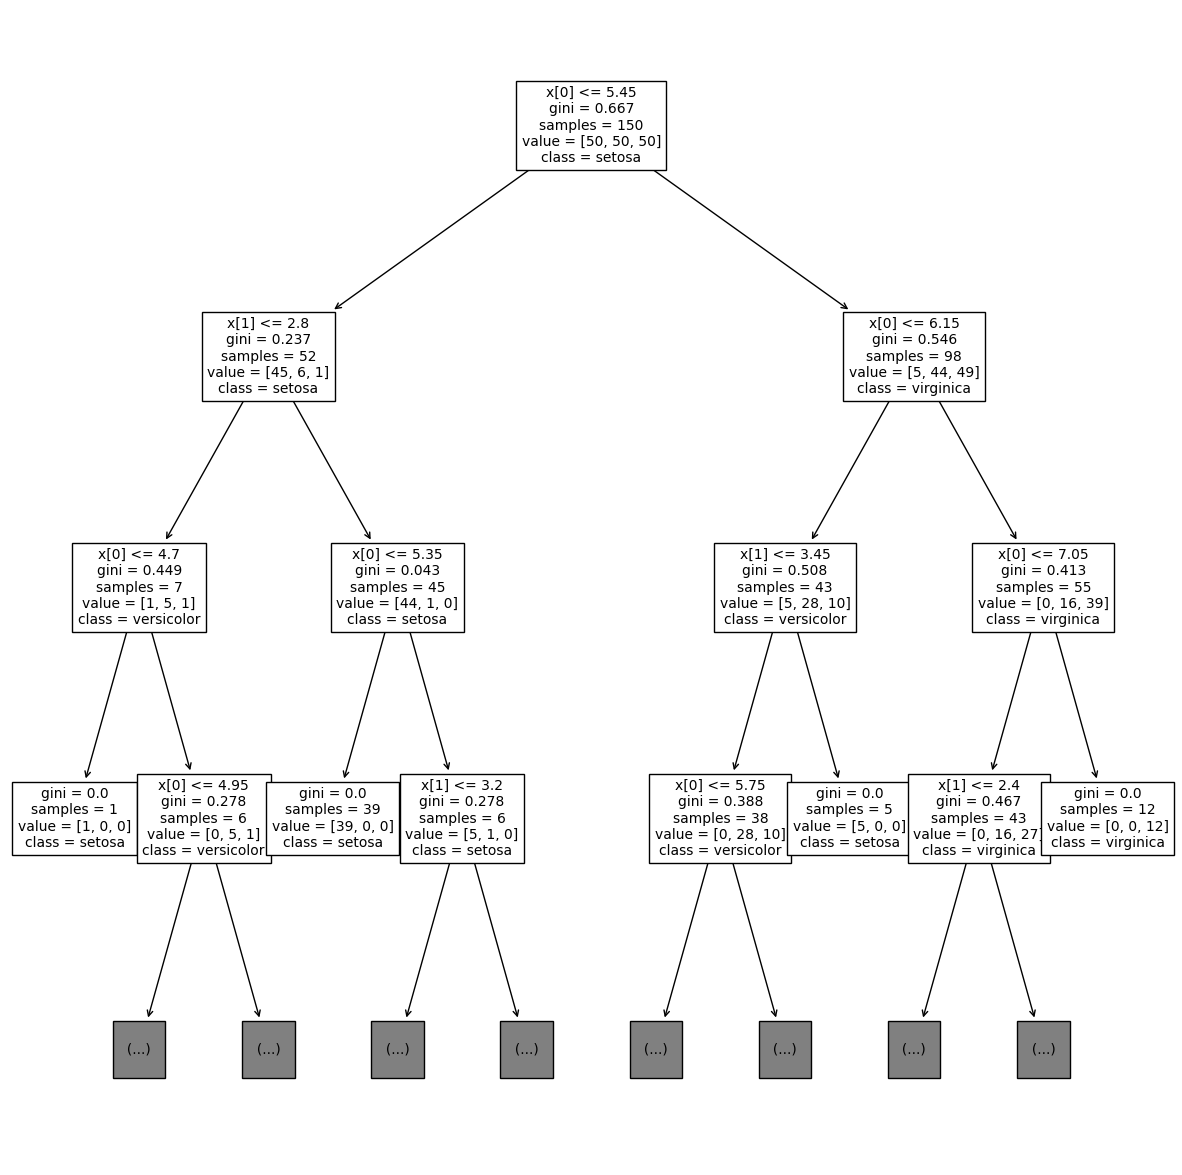

In [15]:
plt.figure(figsize=(15,15))

tree.plot_tree(clf_dt, max_depth=3, fontsize=10, class_names=iris.target_names)

In diesem Diagramm enthält das Array `values` die Anzahl der Werte, die in diesem Knoten enthalten sind. Wenn `values=[0,2,3]`, dann sind 0 Punkte der ersten Klasse, 2 der zweiten Klasse und 3 Punkte der dritten Klasse in diesem Knoten. Falls ein Konten keine Unterknoten hat, so werden alle darin enthaltenen Punkte dieser Klasse zugewiesen.

Auswertung: Gehe direkt zu Kapitel Resultate darstellen, nachdem du diesen Code ausgeführt hast.

## Resultate darstellen

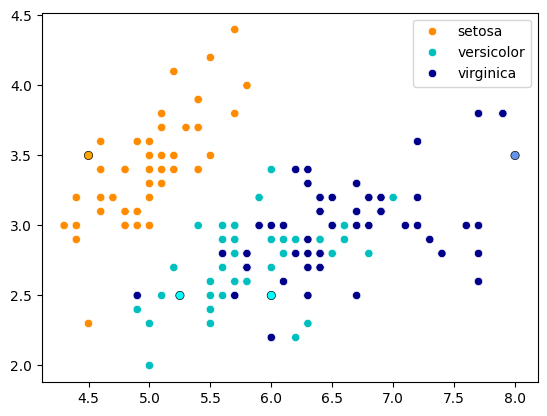

In [12]:
# Simple Liste

fix, ax = plt.subplots()

# Bekannte Punkte plotten
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[Y],
    palette=cmap_bold,
    ax=ax
)

# Zu klassifizierende Punkte
# Die zu klassifierenden Punkte sind weiss mit einem schwarzen Rand
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    ax=ax,
    hue=Y_predict,
    edgecolor="black",
    palette=cmap_light,
    legend=False
)

plt.show()

<Figure size 800x600 with 0 Axes>

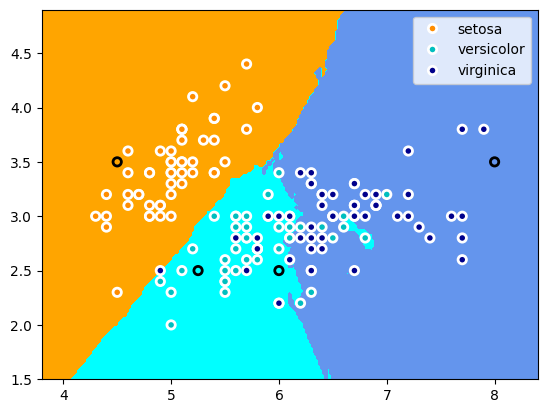

In [13]:
# Mesh-Grid
# Anhand des Hintergrundes sieht man, was der KNN entscheiden würde.

plt.figure(figsize=(8,6))

fix, ax = plt.subplots()

# Meshgrid
plt.contourf(xx, yy, Z_mesh, cmap=ListedColormap(cmap_light))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Bekannte Punkte plotten
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[Y],
    palette=cmap_bold,
    edgecolor="white",
    linewidth=2,
    ax=ax
)

# Zu klassifizierende Punkte nochmals einzeichnen
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    ax=ax,
    hue=Y_predict,
    edgecolor="black",
    palette=cmap_light,
    linewidth=2,
    legend=False
)

plt.show()